### Youtube Comment Sentiment Analysis ###

In this project I'll do an comment analysis of bunch of youtube videos. I've downloaded some sample comments and now will show the steps to do the analysis. At the end of the analysis I'll show wordcloud of most popular words  for postive and negative sentiments of youtube comment.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#read dataset
comments=pd.read_csv(r'C:\Users\Parijat Goswami\OneDrive\2. Data Analysis\Python\Python Projects\1-Youtube Text Data Analysis\GBcomments.csv', 
                     encoding='iso-8859-1', warn_bad_lines=True, error_bad_lines=False)

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [11]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\nððð,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease.Â Care is the cure.Â Ke...,0,0


In [13]:
# If you dont have the install tes=xtblob
#!pip install textblob

In [14]:
from textblob import TextBlob

In [15]:
TextBlob('Its more accurate to call it the M+ (1000) be..').sentiment.polarity

0.45000000000000007

In [16]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [17]:
comments.dropna(inplace=True)

In [18]:
polarity=[] # list which will contain the polarity of the comments

for i in comments['comment_text']:
    polarity.append(TextBlob(i).sentiment.polarity)

In [19]:
comments['polarity']=polarity

In [12]:
comments.head(20)

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.450000
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.000000
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.000000
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.000000
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.000000
5,jt2OHQh0HoQ,Keep calm and buy iphone 8 Keep calm and buy i...,0,0,0.300000
6,jt2OHQh0HoQ,i am a big fan of youtube and u !!!!!!!!!!!!!,0,0,0.000000
7,jt2OHQh0HoQ,You will never find Losers who line up and pay...,0,0,-0.100000
8,jt2OHQh0HoQ,*APPLE JUST COMMENTED ON MY LAST VIDEO* I'm cr...,0,0,0.028571
9,jt2OHQh0HoQ,"I'm only here to see Emma, I love her so much!...",0,0,0.500000


#### EDA for the Positve sentences

In [13]:
comments_positive=comments[comments['polarity']==1]

In [14]:
comments_positive.shape

(20400, 5)

In [15]:
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.0
26,jt2OHQh0HoQ,The best thing to ever happen to iPhone,0,2,1.0
80,jt2OHQh0HoQ,Apple is always awesome \n\nhttps://youtu.be/r...,0,1,1.0
158,YPVcg45W0z4,das a lot of edditing you have done there ... ...,0,0,1.0
175,YPVcg45W0z4,Welcome to the Scandiworld!,0,0,1.0


In [21]:
#!pip install wordcloud

In [16]:
from wordcloud import WordCloud,STOPWORDS

In [17]:
stopwords=set(STOPWORDS)

In [20]:
total_comments=' '.join(comments_positive['comment_text'])

In [22]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

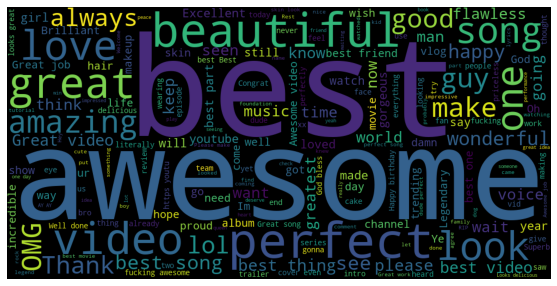

In [23]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

#### EDA for the Negative sentences

In [24]:
comments_negative=comments[comments['polarity']==-1]

In [25]:
total_comments=' '.join(comments_negative['comment_text'])

In [26]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

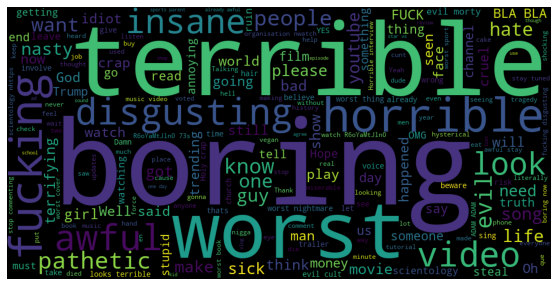

In [27]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')